['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG', 'Z', 'nQ', 'SURVEY_CODE', 'SURVEY_CLASS', 'Z_TONRY', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot_g', 'delfitphot_g', 'absmag_g', 'delabsmag_g', 'absmag

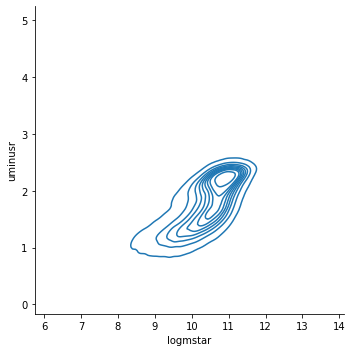

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


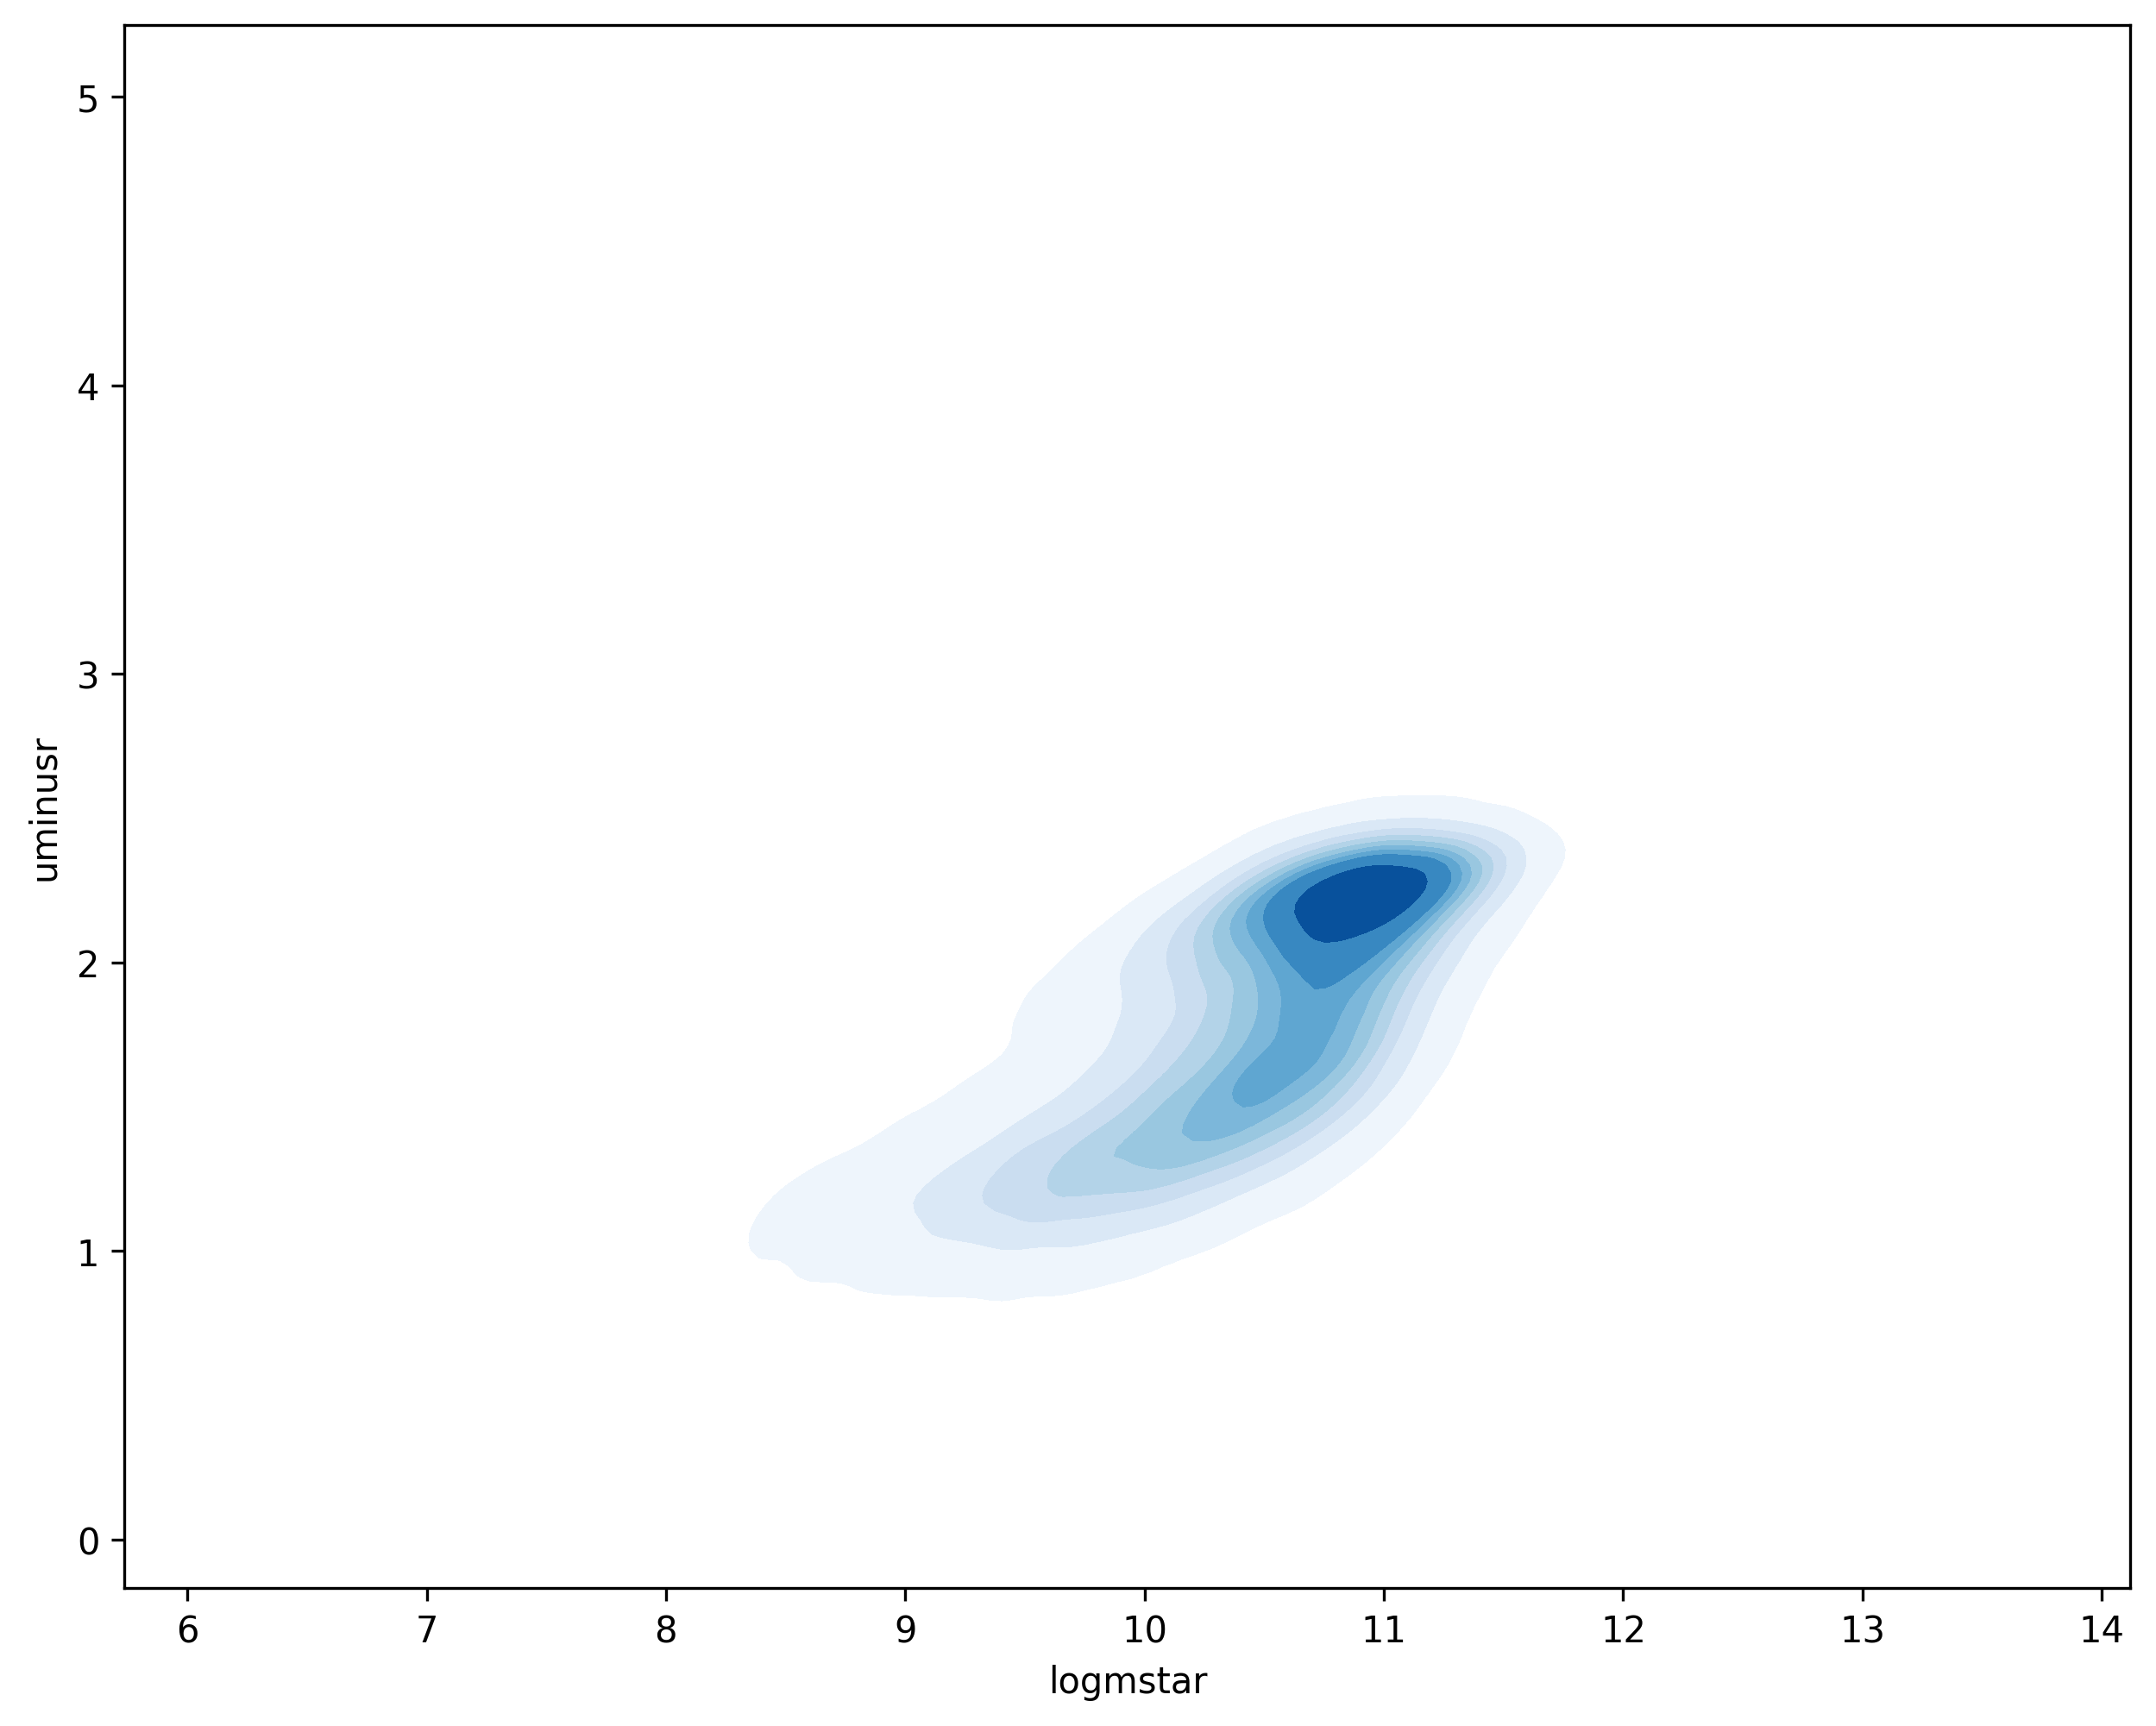

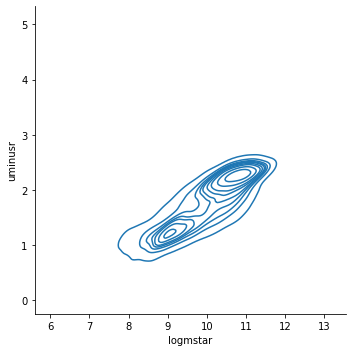

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


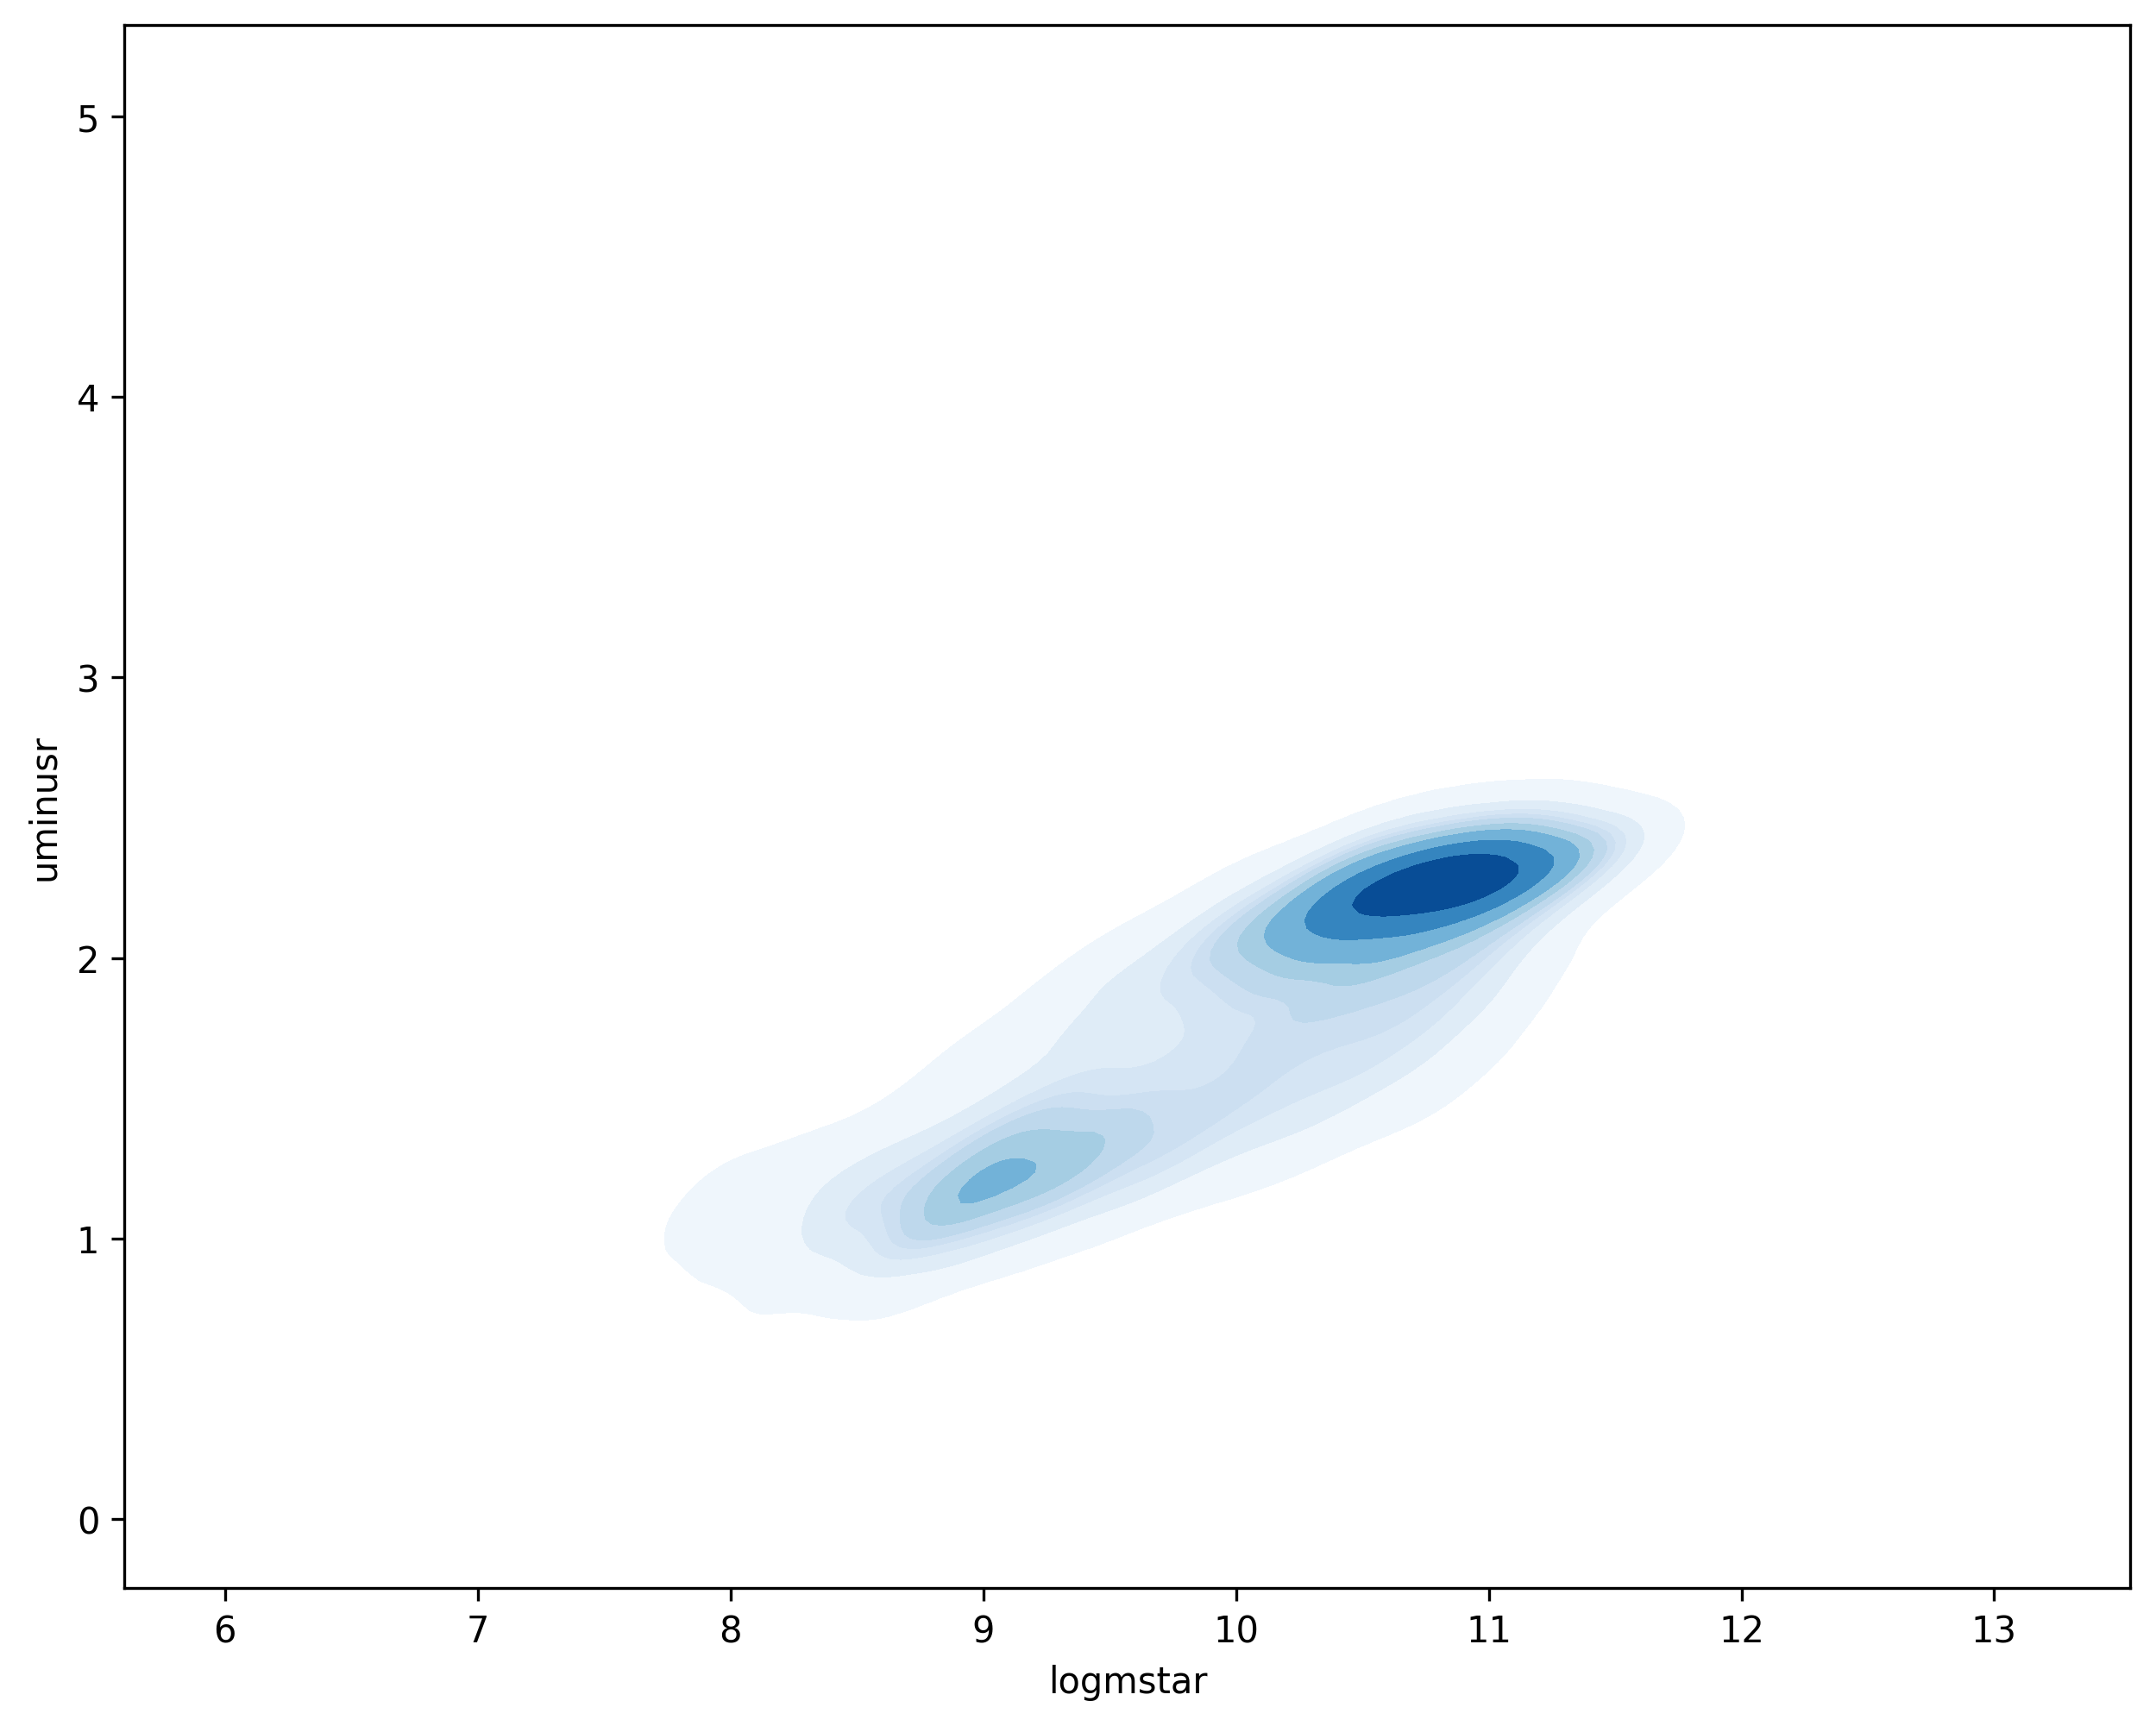

LinregressResult(slope=0.454416690644077, intercept=-2.768071681764752, rvalue=0.8364479548678957, pvalue=0.0, stderr=0.0015138337823765145, intercept_stderr=0.01529913920049831)
0.454416690644077 -2.768071681764752
RedBlue
-------
   True
   True
   True
   True
  False
   True
  False
    ...
   True
  False
  False
   True
   True
   True
  False
Length = 38684 rows
Total : 38684
Red   : 30259
Blue  : 8425


In [5]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# CLEAN Data
#RErange = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
stellarMasses = Table.read('../../GAMA_Data/StellarMassesv19.fits')
stellarMasses = stellarMasses[stellarMasses['uminusr']> 0.001]
stellarMasses = stellarMasses[stellarMasses['logmstar']> 0.001]

stellarMasses = stellarMasses[stellarMasses['logmstar']> 6.0]

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
RErange = join(visualMorph,stellarMasses,keys='CATAID',join_type='inner')
#RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
#RErange = RErange[RErange['AGEDenParFlag'] == 0]
#RErange = RErange[RErange['CountInCylFlag'] == 0]
#RErange = RErange[RErange['uminusr']> 0.001]
#RErange = RErange[RErange['logmstar']> 0.001]




print(RErange.colnames)
print("Slow to run - be patient")

yfield = 'uminusr'
xfield ='logmstar'

# set seaborn style
#sns.set_style("white")

df = stellarMasses.to_pandas()

sns.displot(df, x='logmstar', y='uminusr', kind="kde")
#sns.displot(df, kind="kde")
#sns.kdeplot(df);
#sns.kdeplot(RErange[xfield], RErange[yfield], cmap='Blues')
plt.savefig('../../ChartsPlots/CountourMapAll.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
ax1 = fig.add_subplot(1, 1, 1)
sns.kdeplot(df.logmstar, df.uminusr, ax = ax1, cmap='Blues',  fill=True)
#sns.kdeplot(df.logmstar, df.uminusr, ax = ax1,  hue="kind", fill=True)
plt.savefig('../../ChartsPlots/CountourMapAllFilled.png', dpi=300, bbox_inches='tight')
plt.show()

df = RErange.to_pandas()

sns.displot(df, x='logmstar', y='uminusr', kind="kde")
#sns.displot(df, kind="kde")
#sns.kdeplot(df);
#sns.kdeplot(RErange[xfield], RErange[yfield], cmap='Blues')
plt.savefig('../../ChartsPlots/CountourMapVisual.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
ax1 = fig.add_subplot(1, 1, 1)
sns.kdeplot(df.logmstar, df.uminusr, ax = ax1, cmap='Blues',  fill=True)
#sns.kdeplot(df.logmstar, df.uminusr, ax = ax1,  hue="kind", fill=True)

plt.savefig('../../ChartsPlots/CountourMapVisualFilled.png', dpi=300, bbox_inches='tight')
plt.show()


print(stats.linregress(RErange[xfield],RErange[yfield]))
m,c,r,p,e = stats.linregress(RErange[xfield],RErange[yfield])
print(m,c)
delta = 0.2
RErange.add_column(RErange[yfield] > RErange[xfield]*m + c-delta,name='RedBlue')
print(RErange['RedBlue'])
red = len(RErange[RErange['RedBlue'] == True])
num = len(RErange)
blue = num - red
print('Total : '+str(num))
print('Red   : '+str(red))
print('Blue  : '+str(blue))
fig.tight_layout()